In [24]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:

# Define the API link
api_link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send a GET request to the API
response = requests.get(api_link)

# Extract the JSON data from the response
data = response.json()

# Extract the episodes data
episodes = data["_embedded"]["episodes"]

# Initialize empty lists to store the extracted data
ids = []
urls = []
names = []
seasons = []
numbers = []
types = []
airdates = []
airtimes = []
runtimes = []
ratings = []
summaries = []
medium_images = []
original_images = []

# Extract the required data attributes from each episode
for episode in episodes:
    ids.append(episode["id"])
    urls.append(episode["url"])
    names.append(episode["name"])
    seasons.append(episode["season"])
    numbers.append(episode["number"])
    types.append(episode["type"])
    airdates.append(episode["airdate"])
    airtimes.append(episode["airtime"])
    runtimes.append(episode["runtime"])
    ratings.append(episode["rating"]["average"])
    summaries.append(episode["summary"].strip())
    medium_images.append(episode["image"]["medium"])
    original_images.append(episode["image"]["original"])

# Create a DataFrame from the extracted data
df = pd.DataFrame({
    "id": ids,
    "url": urls,
    "name": names,
    "season": seasons,
    "number": numbers,
    "type": types,
    "airdate": airdates,
    "airtime": airtimes,
    "runtime": runtimes,
    "rating": ratings,
    "summary": summaries,
    "medium_image": medium_images,
    "original_image": original_images
})



In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              36 non-null     int64  
 1   url             36 non-null     object 
 2   name            36 non-null     object 
 3   season          36 non-null     int64  
 4   number          36 non-null     int64  
 5   type            36 non-null     object 
 6   airdate         36 non-null     object 
 7   airtime         36 non-null     object 
 8   runtime         36 non-null     int64  
 9   rating          36 non-null     float64
 10  summary         36 non-null     object 
 11  medium_image    36 non-null     object 
 12  original_image  36 non-null     object 
dtypes: float64(1), int64(4), object(8)
memory usage: 3.8+ KB


## DATA VISUALIZATION

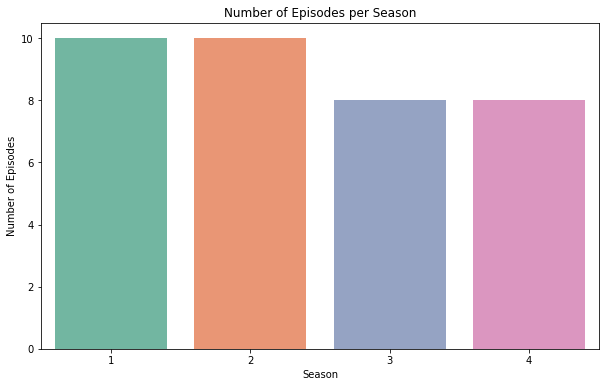

In [25]:
#Number of episodes per season
plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=df, palette='Set2')
plt.xlabel('Season')
plt.ylabel('Number of Episodes')
plt.title('Number of Episodes per Season')
plt.show()

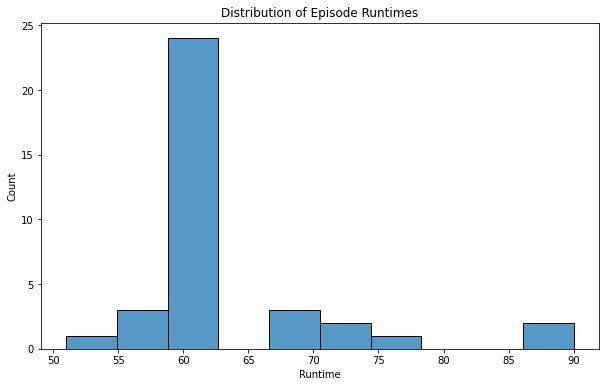

In [28]:
# Question 3: Runtime Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['runtime'], bins=10)
plt.xlabel('Runtime')
plt.ylabel('Count')
plt.title('Distribution of Episode Runtimes')
plt.show()

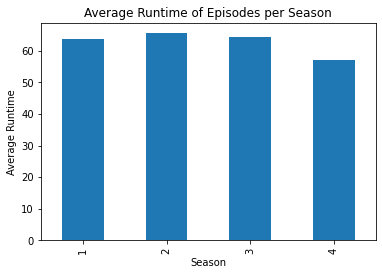

In [15]:
# Average runtime of episodes per season
average_runtime_per_season = df.groupby('season')['runtime'].mean()
average_runtime_per_season.plot(kind='bar', xlabel='Season', ylabel='Average Runtime', title='Average Runtime of Episodes per Season')
plt.show()


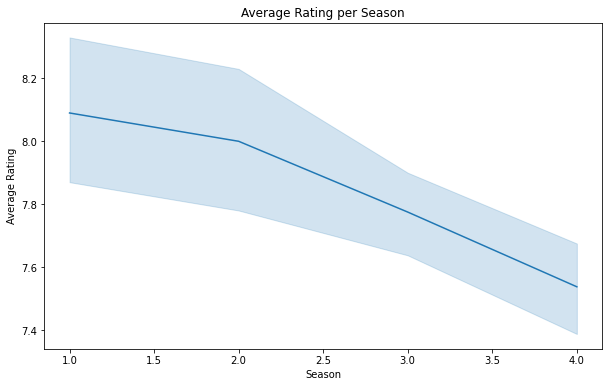

In [26]:
#Average rating of episodes per season
plt.figure(figsize=(10, 6))
sns.lineplot(x='season', y='rating', data=df)
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Rating per Season')
plt.show()


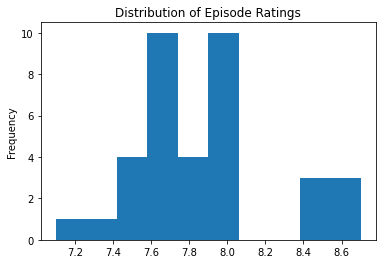

In [22]:
# Distribution of episode ratings
df['rating'].plot(kind='hist', bins=10, xlabel='Rating', ylabel='Count', title='Distribution of Episode Ratings')
plt.show()


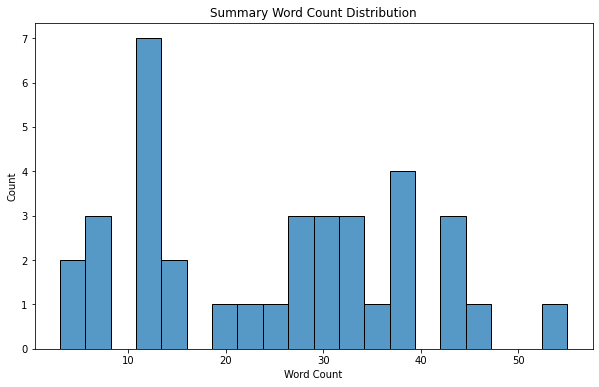

In [27]:
#Summary Word Count Distribution
df['summary_word_count'] = df['summary'].str.split().str.len()
plt.figure(figsize=(10, 6))
sns.histplot(df['summary_word_count'], bins=20)
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.title('Summary Word Count Distribution')
plt.show()

### Get all the overall ratings for each season


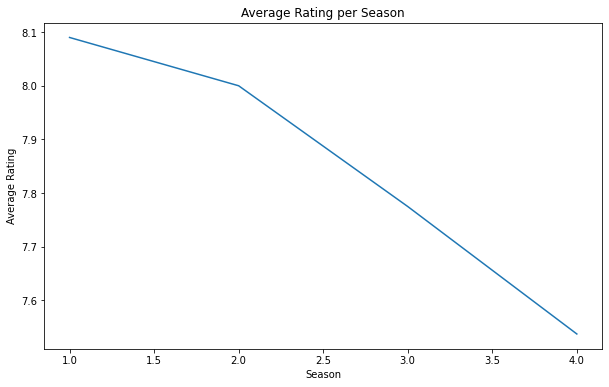

In [33]:
season_ratings = df.groupby('season')['rating'].mean()

# Plotting the ratings for each season
plt.figure(figsize=(10, 6))
sns.lineplot(x=season_ratings.index, y=season_ratings.values)
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Rating per Season')
plt.show()

In [34]:
season_ratings

season
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: rating, dtype: float64

### Get all the episode names with average rating > 8 for every season


In [35]:
highly_rated_episodes = df[df['rating'] > 8]
highly_rated_episodes = highly_rated_episodes.groupby('season')['name'].apply(list)

In [36]:
# Printing the episode names with average rating > 8 for each season
for season, episodes in highly_rated_episodes.items():
    print(f"Season {season}: {episodes}")

Season 1: ["Trompe L'Oeil", 'The Well-Tempered Clavier', 'The Bicameral Mind']
Season 2: ['Kiksuya', 'Vanishing Point', 'The Passenger']


### Get all the episode names that aired before May 2019


In [37]:
early_episodes = df[df['airdate'] < '2019-05-01']['name'].tolist()

# Print the episode names that aired before May 2019
print("Episodes aired before May 2019:")
for episode in early_episodes:
    print(episode)

Episodes aired before May 2019:
The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger


### Get the episode name from each season with the highest and lowest rating


In [38]:
highest_rated_episodes = df.groupby('season')['rating'].idxmax()
lowest_rated_episodes = df.groupby('season')['rating'].idxmin()

In [39]:
# Printing the episode names with the highest and lowest rating for each season
for season, episode_idx in highest_rated_episodes.items():
    print(f"Highest rated episode in Season {season}: {df.loc[episode_idx, 'name']}")
for season, episode_idx in lowest_rated_episodes.items():
    print(f"Lowest rated episode in Season {season}: {df.loc[episode_idx, 'name']}")

Highest rated episode in Season 1: The Bicameral Mind
Highest rated episode in Season 2: Kiksuya
Highest rated episode in Season 3: Parce Domine
Highest rated episode in Season 4: Zhuangzi
Lowest rated episode in Season 1: The Stray
Lowest rated episode in Season 2: Akane No Mai
Lowest rated episode in Season 3: Decoherence
Lowest rated episode in Season 4: The Auguries


### Get the summary for the most popular (highest rated) episode in every season


In [40]:
most_popular_episodes = df.groupby('season')['rating'].idxmax()

# Print the summaries of the most popular episodes in each season
for season, episode_idx in most_popular_episodes.items():
    print(f"Summary of the most popular episode in Season {season}:")
    print(df.loc[episode_idx, 'summary'])
    print('\n')

Summary of the most popular episode in Season 1:
<p>Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.</p>


Summary of the most popular episode in Season 2:
<p>Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.</p>


Summary of the most popular episode in Season 3:
<p>If you're stuck in a loop, try walking in a straight line.</p>


Summary of the most popular episode in Season 4:
<p>God is bored.</p>


